In [1]:
def system(t, y):
    y1, y2 = y
    dy1dt = -0.1 * y1
    dy2dt = -0.2 * y2
    return [dy1dt, dy2dt]

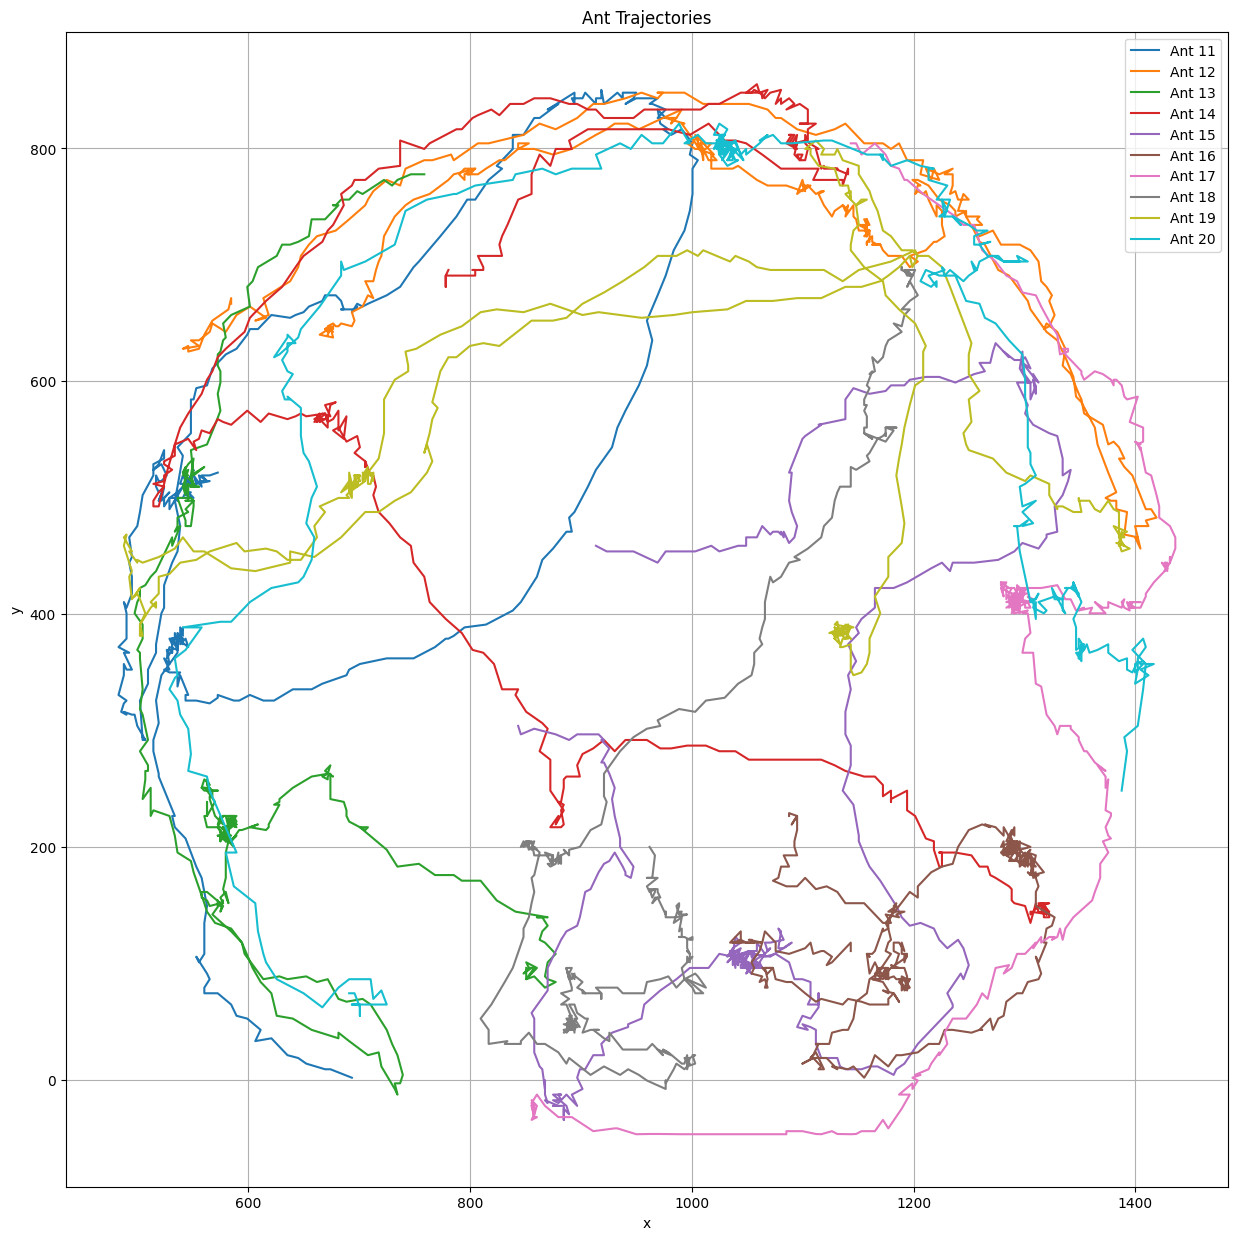

In [3]:
from data_functions import get_ant_datafiles_info, preprocess_antcolony_data
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

ant_data = get_ant_datafiles_info()
preprocessed_ant_data = preprocess_antcolony_data(ant_data['file'][0])

x = preprocessed_ant_data['x']
y = preprocessed_ant_data['y']

# t = np.linspace(0,100,1000)
# y0 = []
# y0 = [10,10]
# y = odeint(system, t, y0)


plt.figure(figsize=(15,15))
for ant_id, ant_data in preprocessed_ant_data.groupby('ant_id'):
    plt.plot(ant_data['x'], ant_data['y'], label=f'Ant {ant_id}')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Ant Trajectories')
plt.legend()
plt.grid(True)
plt.show()   



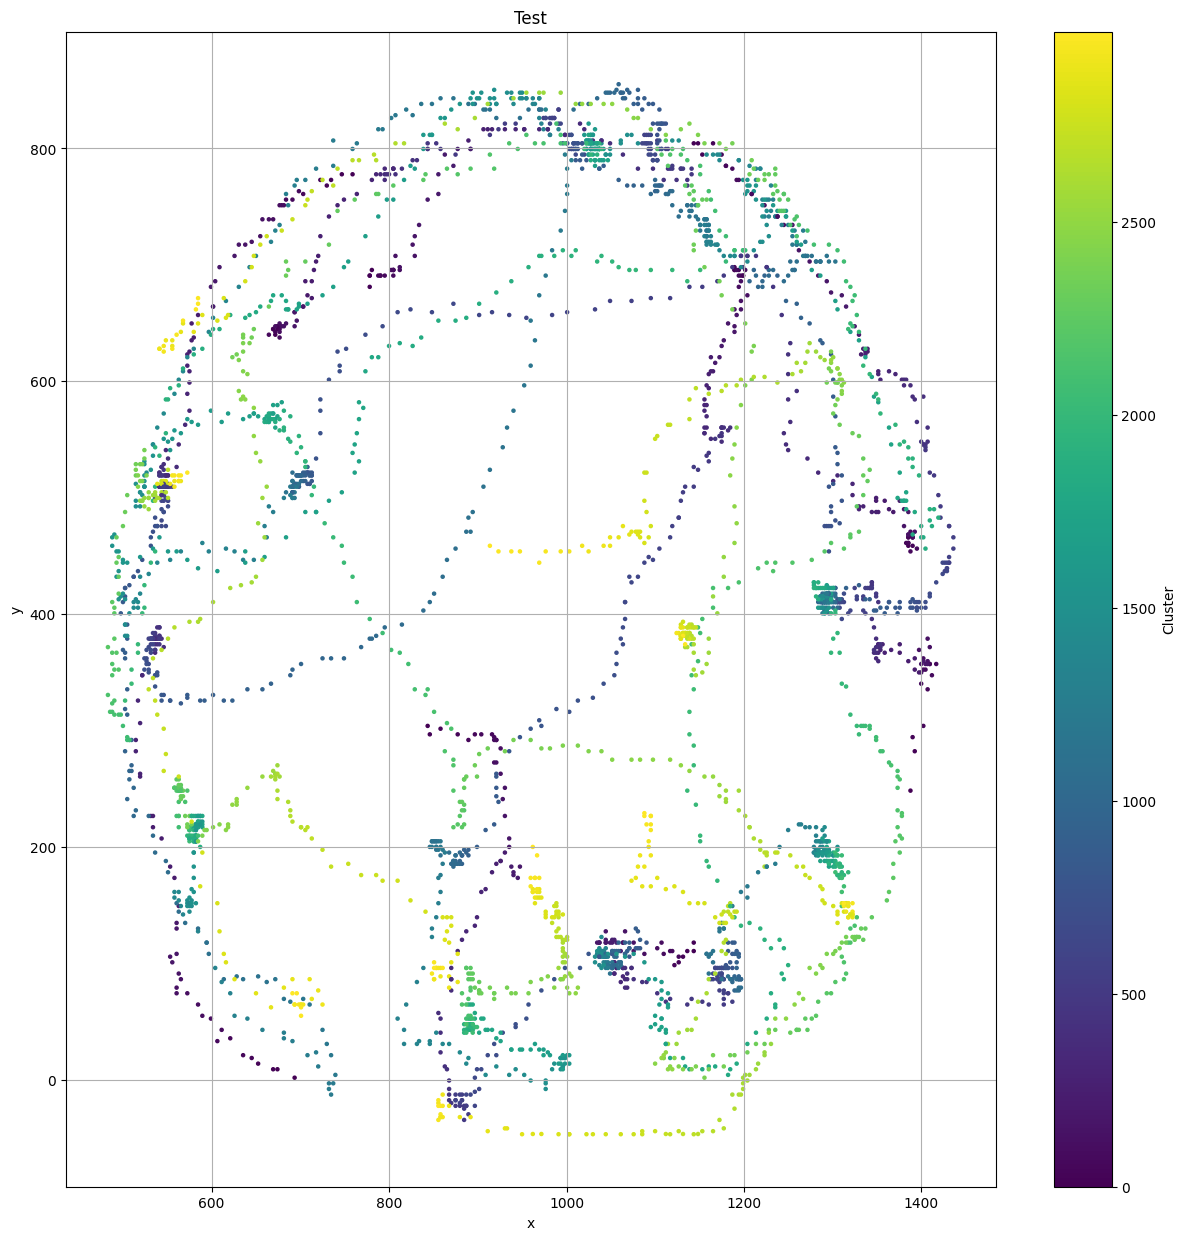

In [4]:
from sklearn.cluster import DBSCAN

X = preprocessed_ant_data[['x','y']]
clust = DBSCAN(eps=0.1, min_samples=1).fit(X)
preprocessed_ant_data['cluster'] =  clust.labels_

plt.figure(figsize=(15,15))
plt.scatter(x,y,c=preprocessed_ant_data['cluster'], cmap = 'viridis', s = 5)
plt.xlabel('x')
plt.ylabel('y')
plt.title("Test")

plt.colorbar(label = "Cluster")
plt.grid(True)
plt.show()

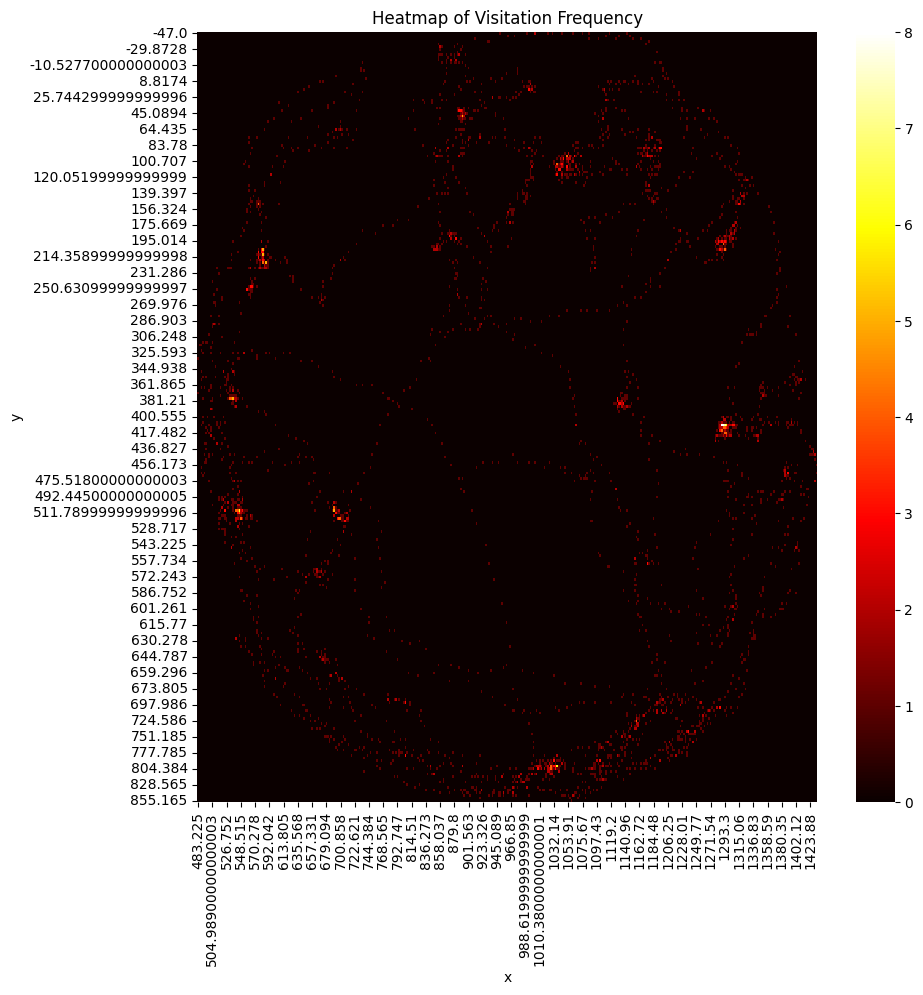

In [5]:
import seaborn as sns

# Create heatmap of visitation frequency
heatmap = preprocessed_ant_data.groupby(['x', 'y']).size().reset_index(name='count')
heatmap = heatmap.pivot(index='y', columns='x', values='count').fillna(0)

plt.figure(figsize=(10, 10))
sns.heatmap(heatmap, cmap='hot')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Heatmap of Visitation Frequency')
plt.show()

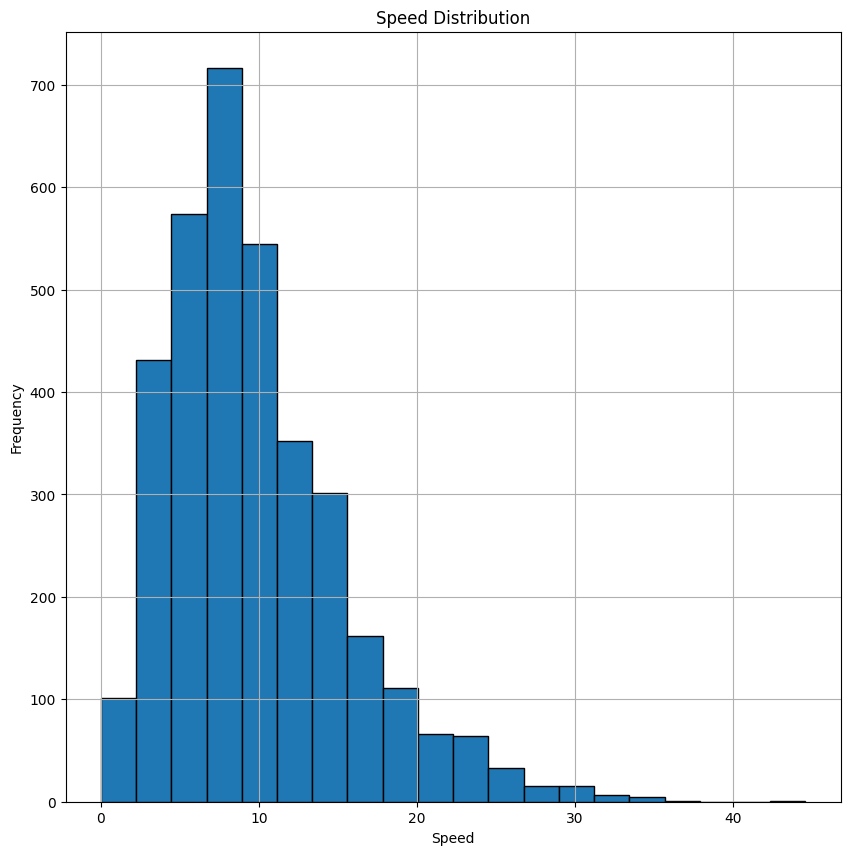

In [6]:
plt.figure(figsize=(10,10))

plt.hist(preprocessed_ant_data['speed'], bins=20, edgecolor = 'black')
plt.xlabel('Speed')
plt.ylabel('Frequency')
plt.title("Speed Distribution")
plt.grid(True)

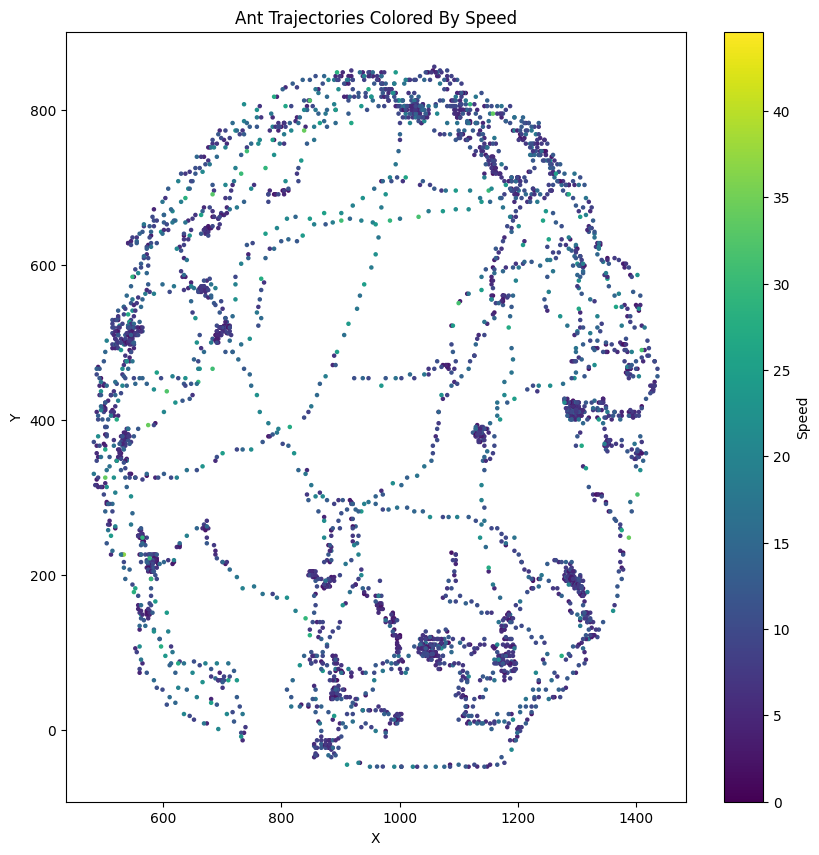

In [7]:
plt.figure(figsize=(10,10))
plt.scatter(x,y,c=preprocessed_ant_data['speed'], cmap='viridis', s =5)
plt.colorbar(label="Speed")
plt.xlabel('X')
plt.ylabel('Y')
plt.title("Ant Trajectories Colored By Speed")
plt.show()

c:\Users\Daniël\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


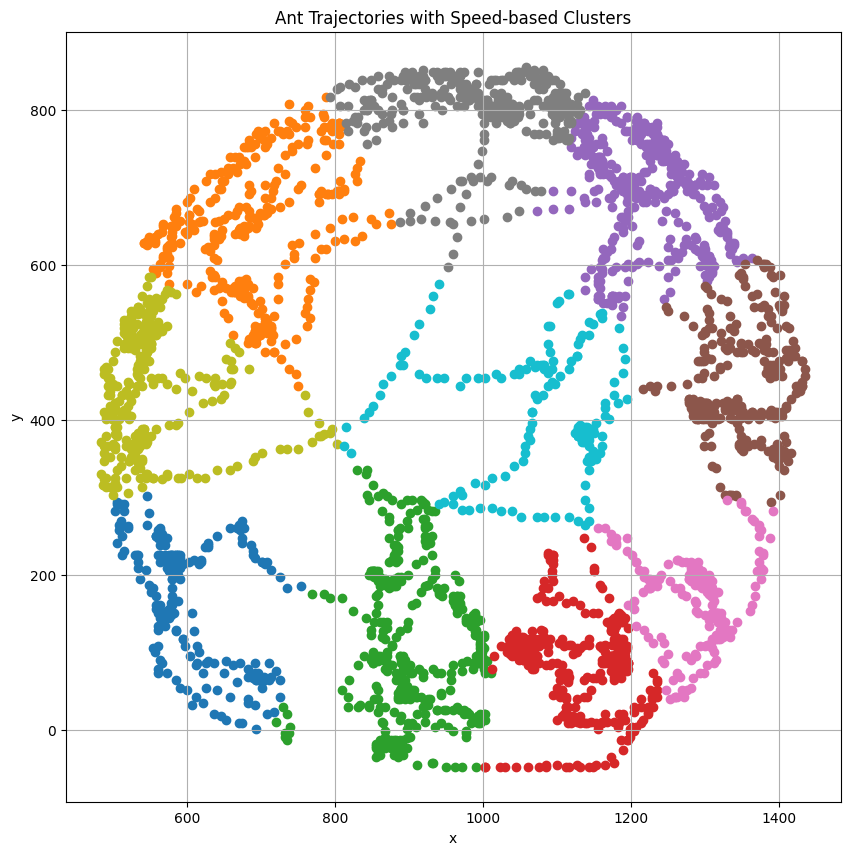

In [8]:
from sklearn.cluster import KMeans

X = preprocessed_ant_data[['x','y','speed']].fillna(0)

kmeans = KMeans(n_clusters=10, random_state=42)
preprocessed_ant_data['cluster_speed'] = kmeans.fit_predict(X)

plt.figure(figsize=(10,10))
for cluster in preprocessed_ant_data['cluster_speed'].unique():
    cluster_data = preprocessed_ant_data[preprocessed_ant_data['cluster_speed'] == cluster]
    plt.scatter(cluster_data['x'], cluster_data['y'], label = f"Cluster {cluster}")

plt.xlabel('x')
plt.ylabel('y')
plt.title('Ant Trajectories with Speed-based Clusters')
plt.grid(True)
plt.show()